In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import datetime as dt

import warnings 

In [4]:
df = pd.read_csv("train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
zero_percentage = (df == 0).mean() * 100
zero_percentage 

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64

In [7]:
high_zero_columns = zero_percentage[zero_percentage > 50].index
high_zero_columns

Index(['MasVnrArea', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

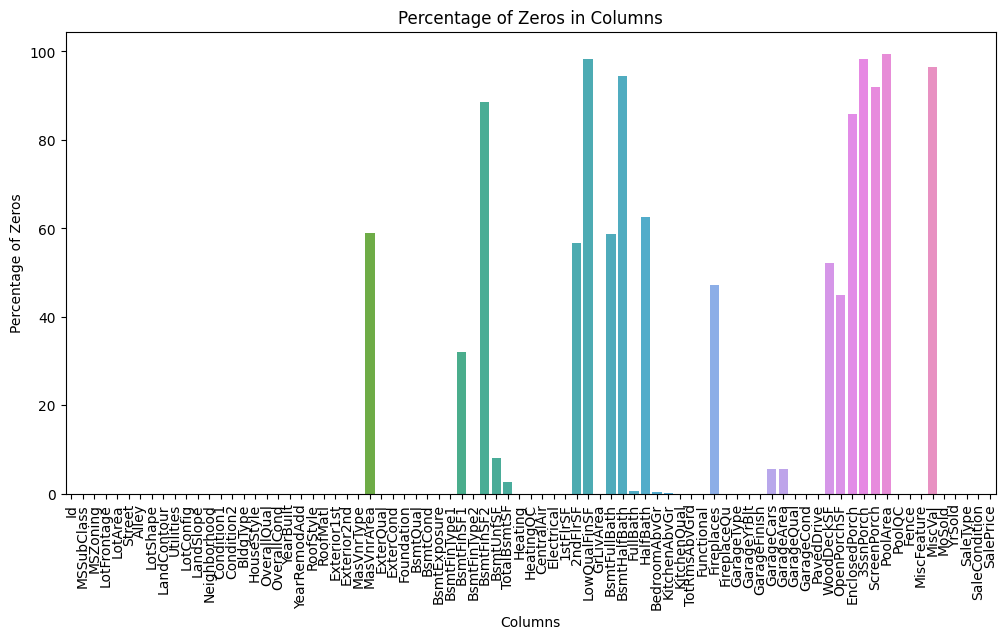

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x=zero_percentage.index, y=zero_percentage.values)
plt.xticks(rotation=90)
plt.ylabel("Percentage of Zeros")
plt.xlabel("Columns")
plt.title("Percentage of Zeros in Columns")
plt.show()


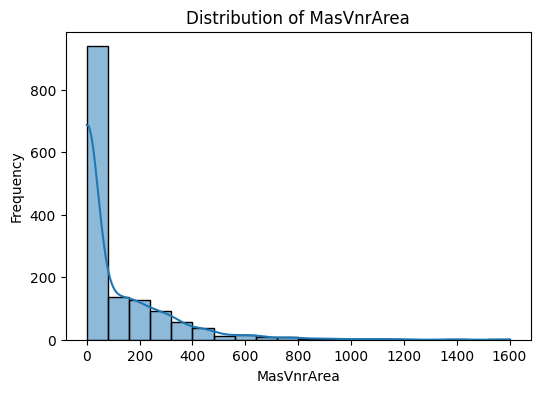

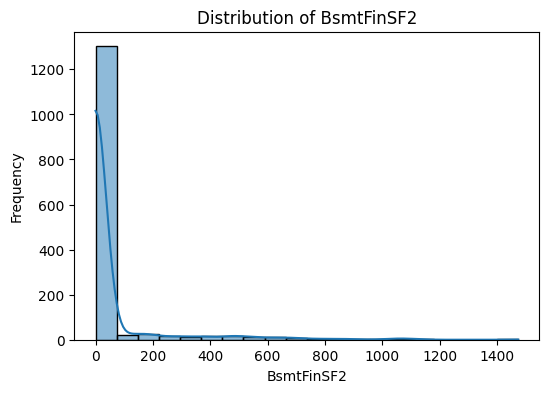

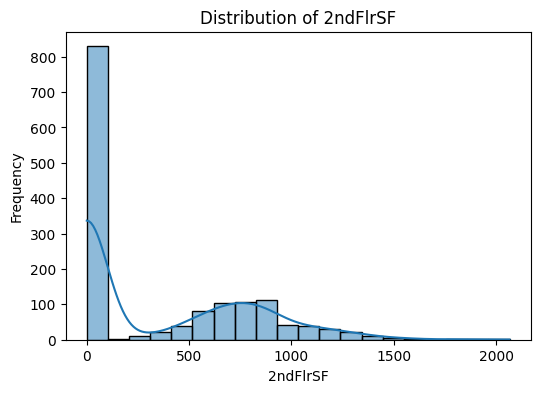

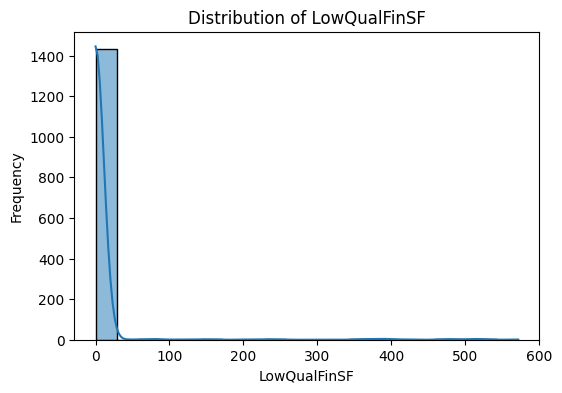

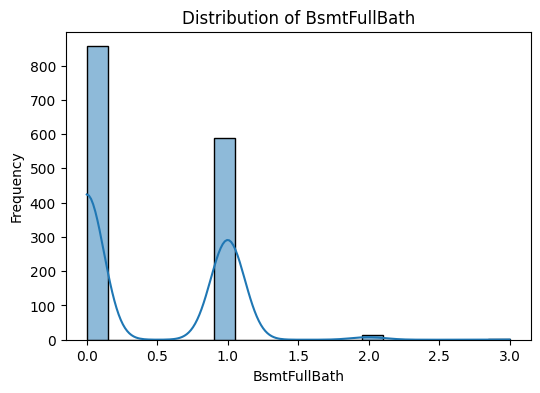

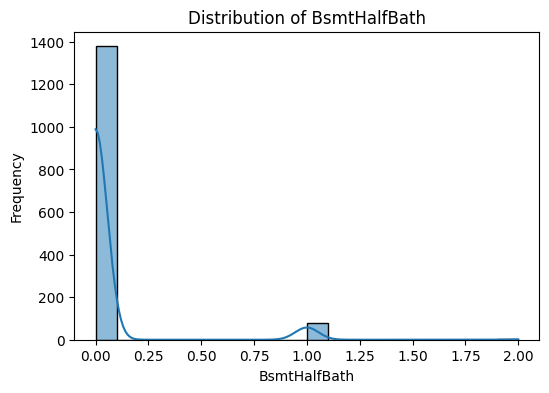

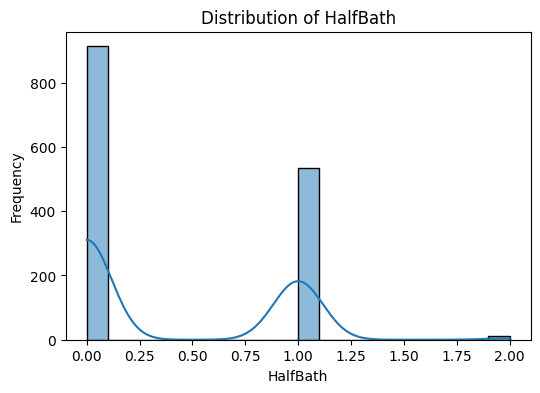

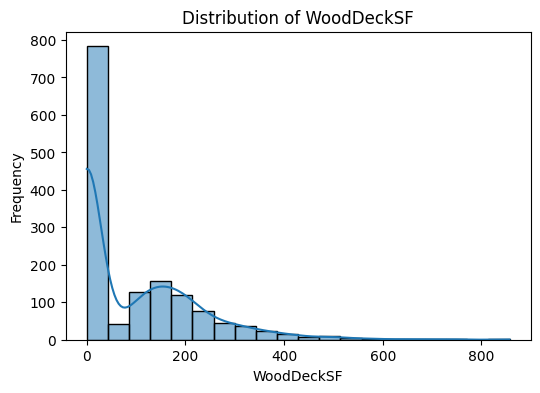

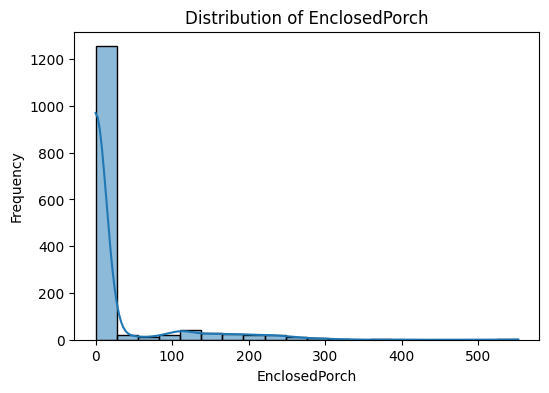

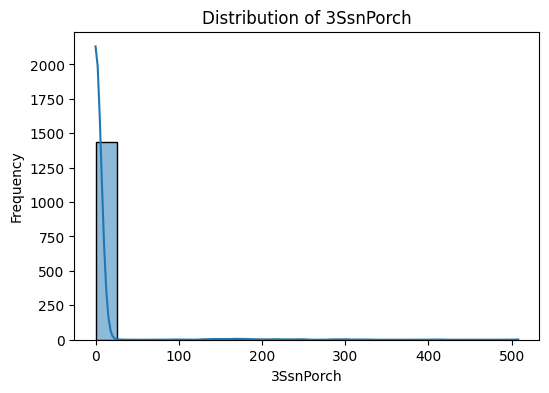

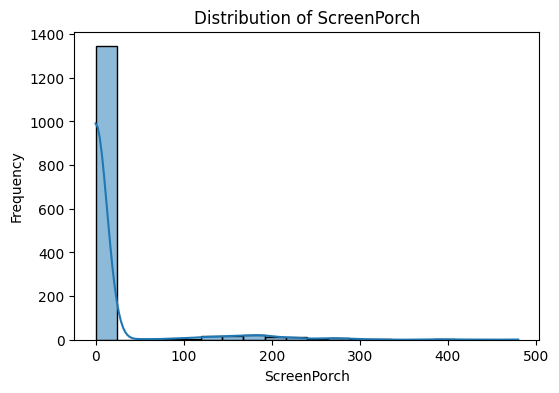

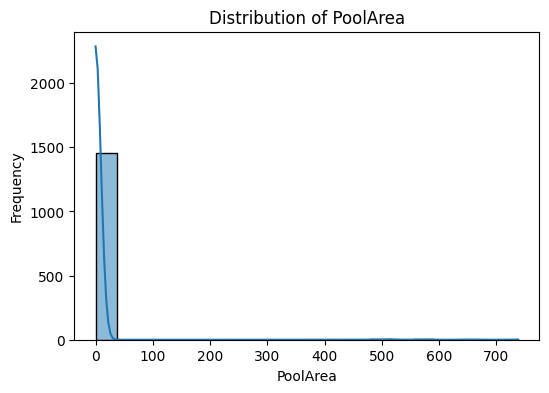

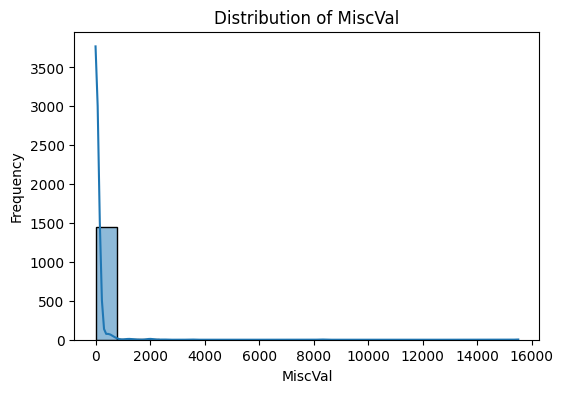

In [9]:
for col in high_zero_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


In [10]:
df.drop(columns = high_zero_columns, inplace= True)

In [11]:
df.shape

(1460, 68)

In [12]:
df_zero =df
df_zero.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PavedDrive,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Y,61,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Y,0,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Y,42,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Y,35,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Y,84,NaN,NaN,NaN,12,2008,WD,Normal,250000


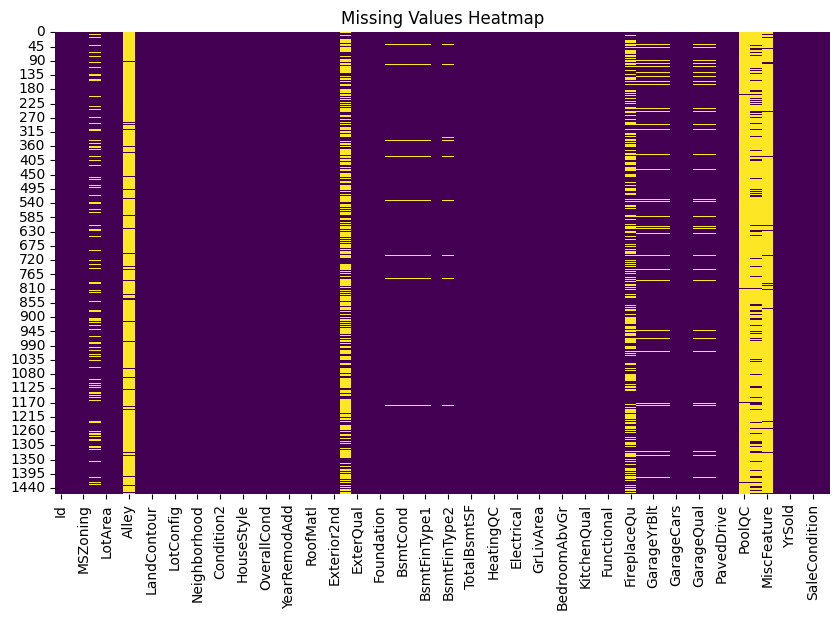

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_zero.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [14]:
features = list(df_zero.columns)

In [15]:
null_cutoff = df_zero.shape[0] / 2

In [16]:
drop_features = []

for feature in features:
    if df_zero[df_zero[feature].isna()].shape[0] > null_cutoff:
        drop_features.append(feature)

In [17]:
df_zero.drop(columns=drop_features, inplace=True)


In [18]:
column_count = df_zero.shape[1]
column_count

63

In [19]:
null_counts = df_zero.isnull().sum()
null_counts

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 63, dtype: int64

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(null_counts)

pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
GrLivArea          0
FullBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces   

In [21]:
df_zero.shape

(1460, 63)

In [22]:
df_zero["FireplaceQu"].isnull().sum()

690

In [23]:
df_zero.drop(columns = ['FireplaceQu'], inplace=True)
# df_zero

In [24]:
df_zero.drop(columns = ['LotFrontage'], inplace=True)
df_zero.shape

(1460, 61)

In [25]:
df_zero.drop(columns = ['Id'], inplace=True)


In [26]:
df_zero.shape

(1460, 60)

Remove Outliers

<Axes: >

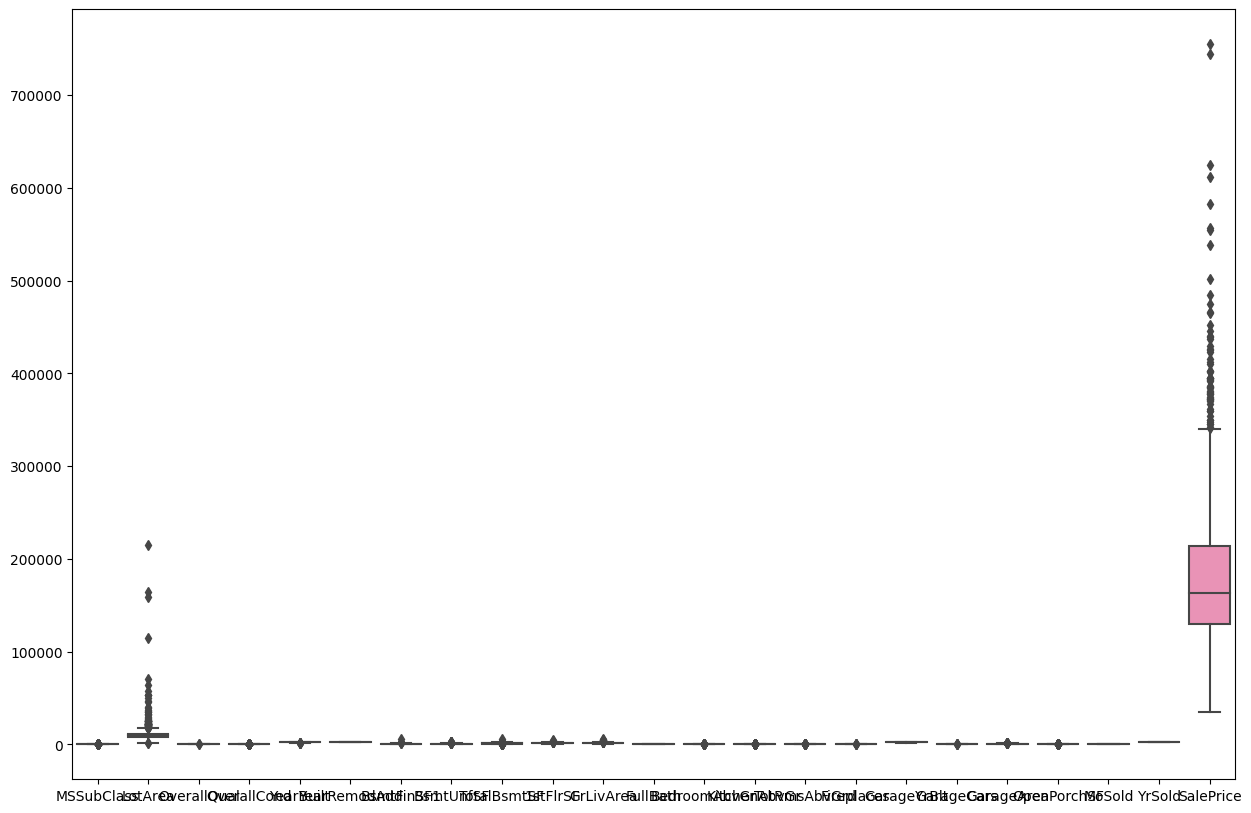

In [30]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.boxplot(data=df_zero, ax = ax)

C:\Users\sivac\AppData\Local\Temp\ipykernel_14520\882061647.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


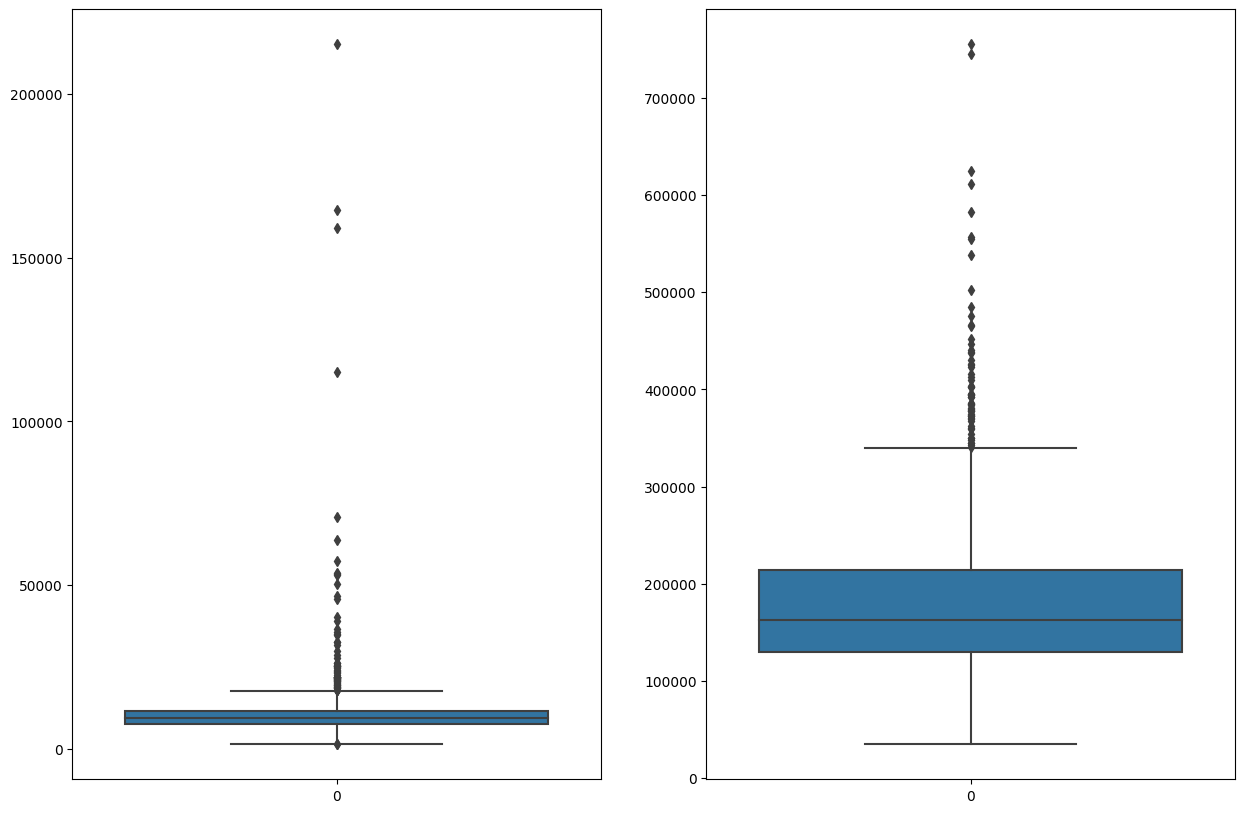

In [31]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
sns.boxplot(data=df_zero['LotArea'], ax = ax[0])
sns.boxplot(data=df_zero['SalePrice'], ax = ax[1])
fig.show()

In [32]:
sample_df = df_zero.copy()

In [33]:
def remove_outliers(data, features):
  for feature in features:
    print(f'feature : {feature}')
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 -Q1
    print(f'Q1 = {Q1}, Q3 = {Q3}')
    low = Q1 - (1.5*IQR)
    high = Q3 + 1.5*IQR
    print(f'Low = {low}, High = {high}')

    data = data[(data[feature]>= low) & (data[feature]<= high)]

  return data

In [34]:
sample_df = remove_outliers(sample_df,  ['SalePrice', 'LotArea'])

feature : SalePrice
Q1 = 129975.0, Q3 = 214000.0
Low = 3937.5, High = 340037.5
feature : LotArea
Q1 = 7442.0, Q3 = 11316.5
Low = 1630.25, High = 17128.25


C:\Users\sivac\AppData\Local\Temp\ipykernel_14520\4285061515.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


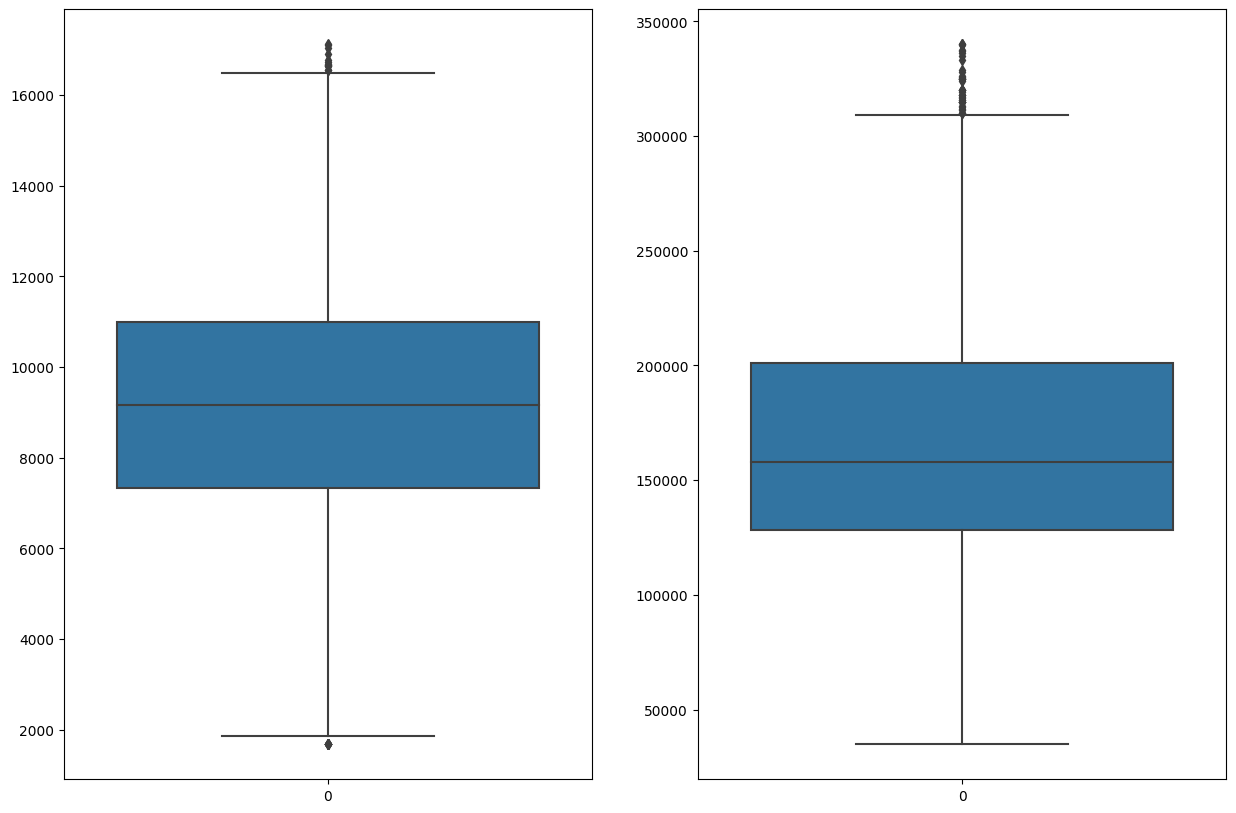

In [35]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
sns.boxplot(data=sample_df['LotArea'], ax = ax[0])
sns.boxplot(data=sample_df['SalePrice'], ax = ax[1])
fig.show()

In [36]:
df = sample_df.copy()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1326 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1326 non-null   int64  
 1   MSZoning       1326 non-null   object 
 2   LotArea        1326 non-null   int64  
 3   Street         1326 non-null   object 
 4   LotShape       1326 non-null   object 
 5   LandContour    1326 non-null   object 
 6   Utilities      1326 non-null   object 
 7   LotConfig      1326 non-null   object 
 8   LandSlope      1326 non-null   object 
 9   Neighborhood   1326 non-null   object 
 10  Condition1     1326 non-null   object 
 11  Condition2     1326 non-null   object 
 12  BldgType       1326 non-null   object 
 13  HouseStyle     1326 non-null   object 
 14  OverallQual    1326 non-null   int64  
 15  OverallCond    1326 non-null   int64  
 16  YearBuilt      1326 non-null   int64  
 17  YearRemodAdd   1326 non-null   int64  
 18  RoofStyle    

In [38]:
df.shape

(1326, 60)

In [39]:
cols = list(df.columns)
cat_cols = []
num_cols = []
for item in cols:
  if df[item].dtype == "O":
    cat_cols.append(item)
  else :
    num_cols.append(item)

In [40]:
num_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'MoSold',
 'YrSold',
 'SalePrice']

In [41]:
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [42]:
df.shape

(1326, 60)

In [43]:
def encode_fillnull(df, features, mapper_dict, target= None, plot=False):
  #removing null values
  for feature in features:
    #print(feature)
    df[feature].fillna('other', inplace=True)
    if target is not None:            # for training data
      # encoding preserved correlation with target feature
      values = list(df.groupby(feature)[target].mean().sort_values().index)
      scale_mapper = {value: index for index, value in enumerate(values)}
      encoded_feature = feature + "Encoded"
      df[encoded_feature] = df[feature].replace(scale_mapper)

      mapper_dict[feature] = values

    else :                # for test data
      values = mapper_dict[feature]
      scale_mapper = {value: index for index, value in enumerate(values)}
      encoded_feature = feature + "Encoded"
      df[encoded_feature] = df[feature].replace(scale_mapper)

  if plot == True:
    try :
      fig, ax = plt.subplots(nrows= len(features), ncols = 2, figsize=(15, 15))
      for index, feature in enumerate(features):
        encoded_feature = feature + "Encoded"
        sns.barplot(data = df, x=feature, y=target, ax=ax[index, 0])
        sns.barplot(data = df, x=encoded_feature, y=target, ax=ax[index, 1])
      fig.show()
    except :
        print("a")

In [44]:
mapper_df = dict()

In [45]:
encode_fillnull(df, cat_cols, mapper_df, target='SalePrice')

In [46]:
df.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ElectricalEncoded,KitchenQualEncoded,FunctionalEncoded,GarageTypeEncoded,GarageFinishEncoded,GarageQualEncoded,GarageCondEncoded,PavedDriveEncoded,SaleTypeEncoded,SaleConditionEncoded
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,5,2,5,5,2,4,5,2,5,4
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,5,1,5,5,2,4,5,2,5,4
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,5,2,5,5,2,4,5,2,5,4
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,5,2,5,2,1,4,5,2,5,2
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,5,2,5,5,2,4,5,2,5,4


In [47]:
df.shape

(1326, 97)

C:\Users\sivac\AppData\Local\Temp\ipykernel_14520\2053860949.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


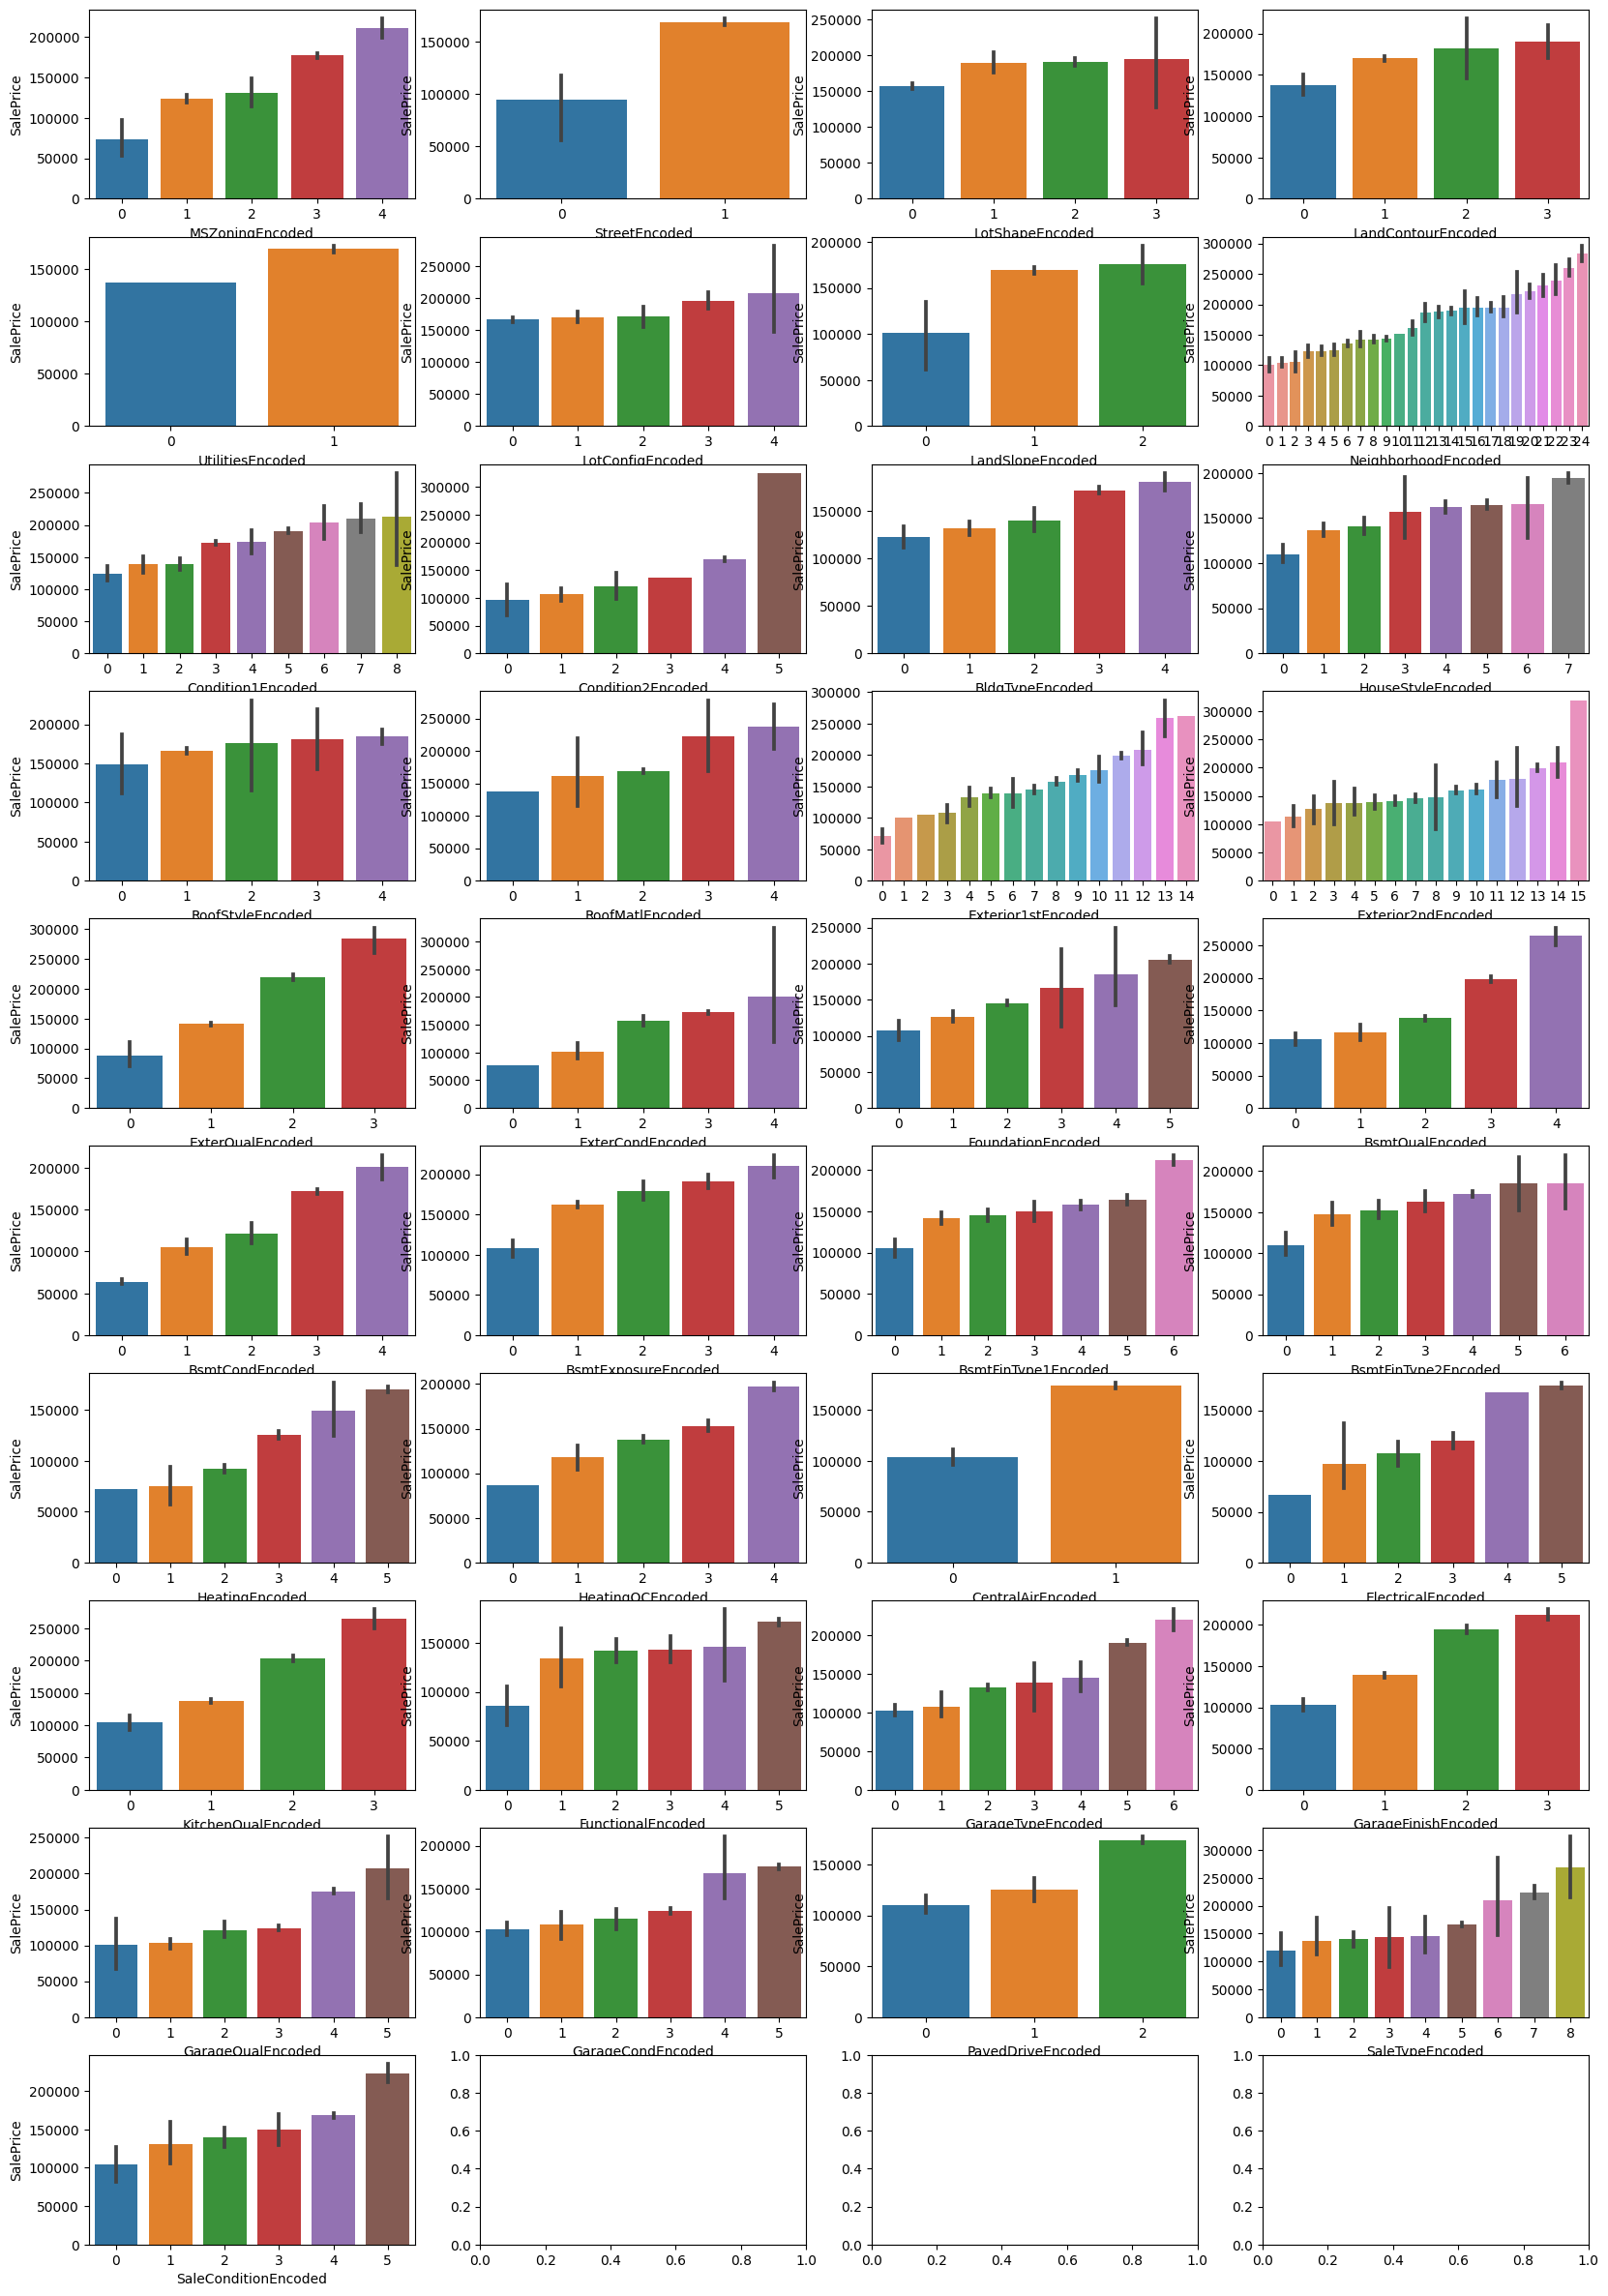

In [48]:
nrows = int(len(cat_cols)/4)+ 1
ncols = 4
fig, ax = plt.subplots(nrows= nrows, ncols = ncols, figsize=(20,30))
for index, feature in enumerate(cat_cols):
  i = int((index)/4)
  j = int((index)%4)
  sns.barplot(data=df, x=feature+"Encoded", y= 'SalePrice', ax=ax[i, j])
fig.show()

C:\Users\sivac\AppData\Local\Temp\ipykernel_29480\844604959.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


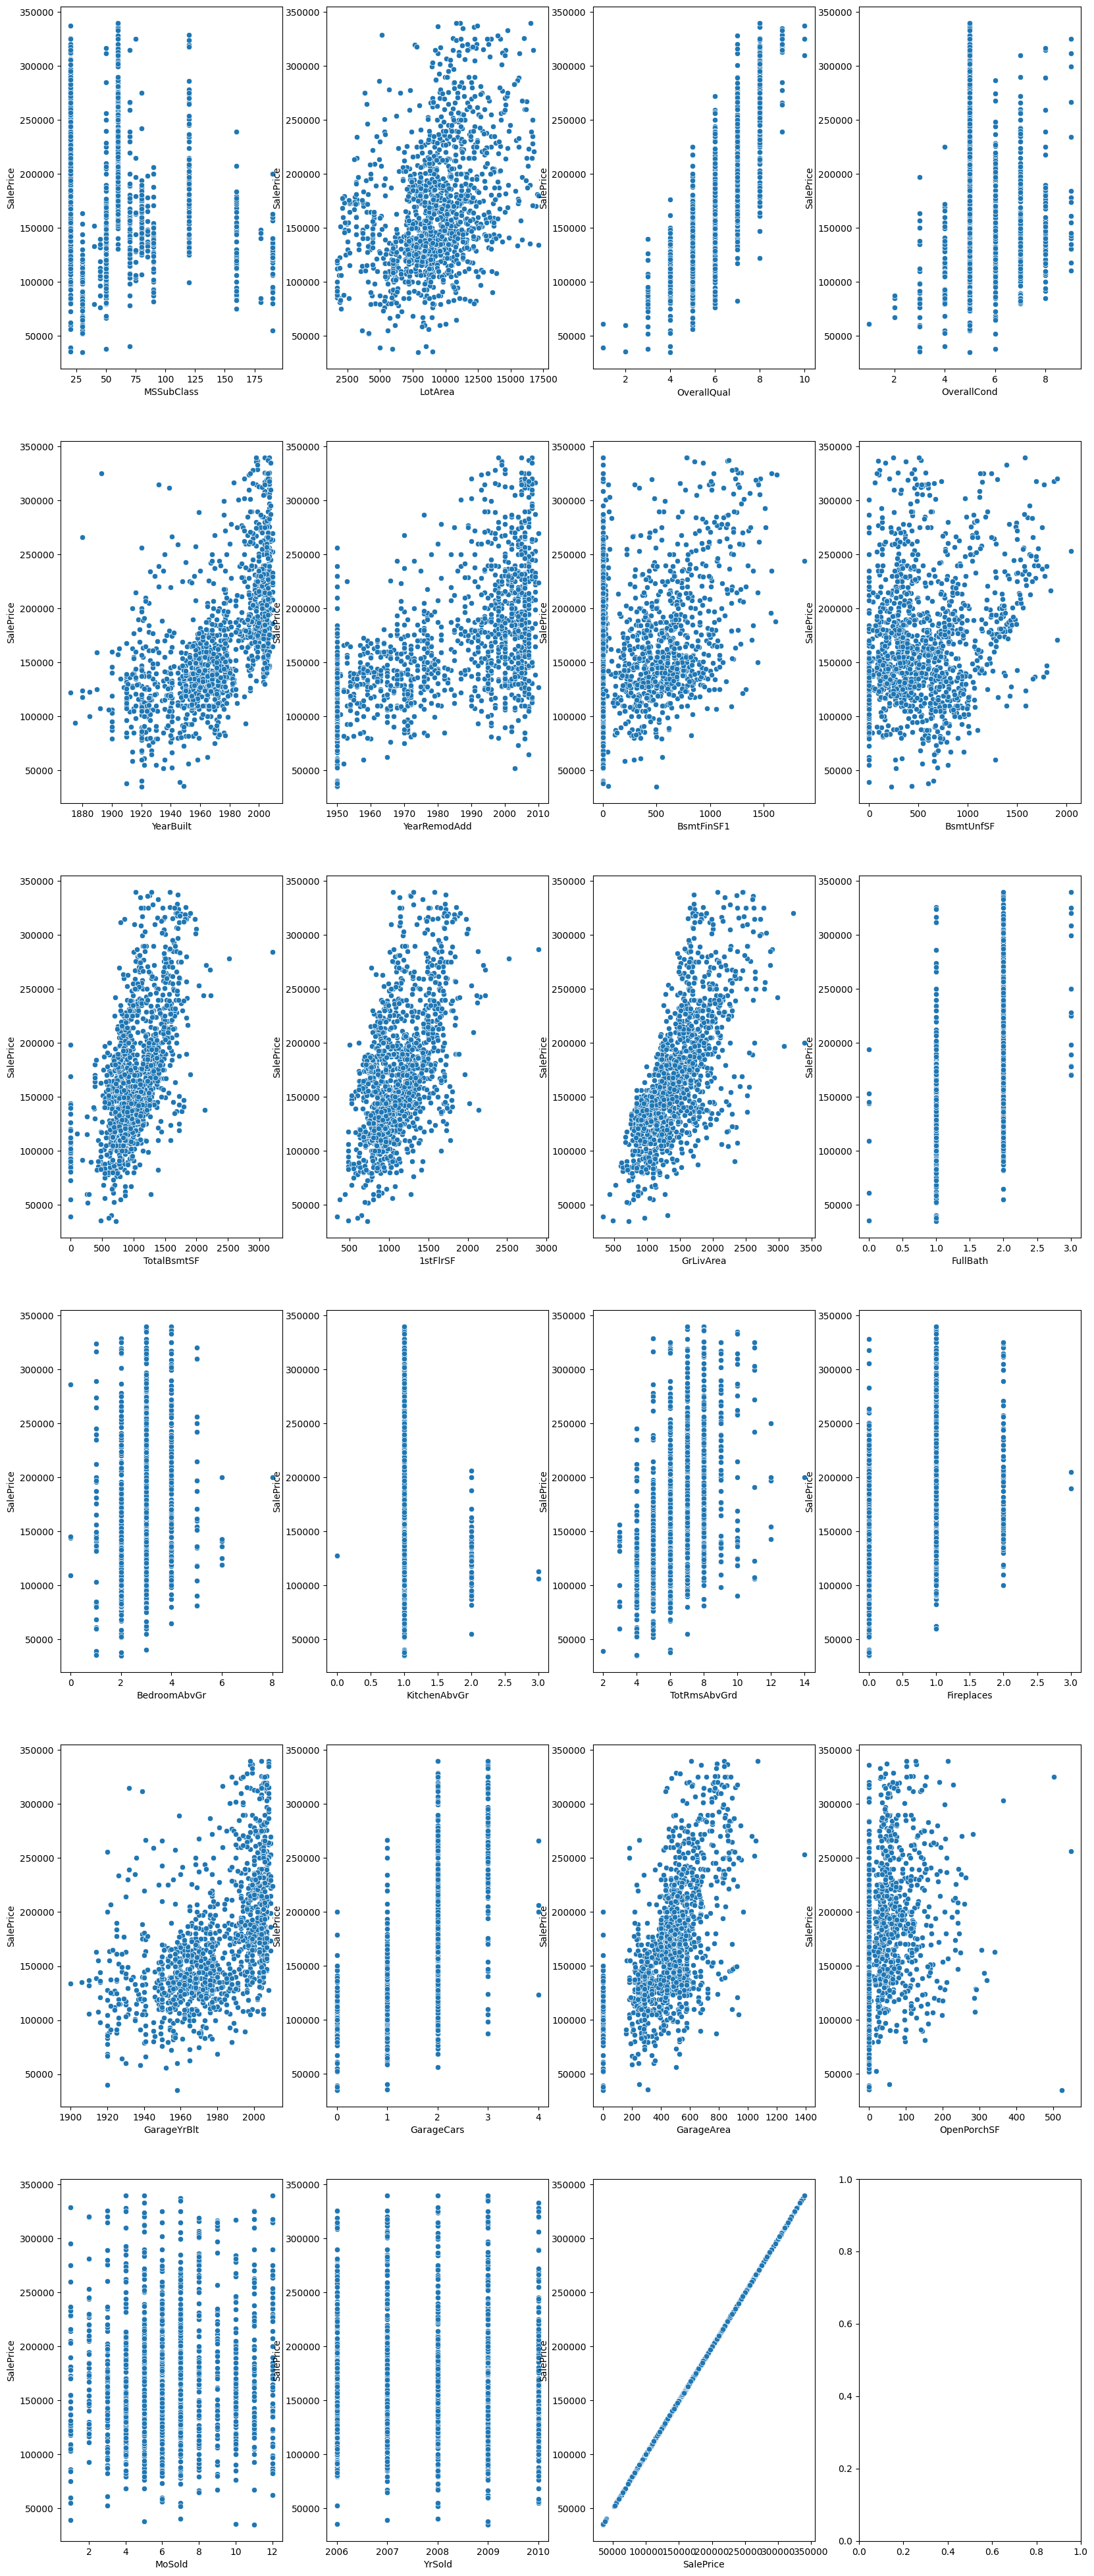

In [39]:
nrows = int(len(num_cols)/4)+ 1
ncols = 4
fig, ax = plt.subplots(nrows= nrows, ncols = ncols, figsize=(20,50))
for index, feature in enumerate(num_cols):
  i = int((index)/4)
  j = int((index)%4)
  sns.scatterplot(data=df, x=feature, y= 'SalePrice', ax=ax[i, j])
fig.show()

In [49]:
df.shape

(1326, 97)

In [50]:
df.drop(columns=cat_cols, inplace=True)


In [51]:
df.shape

(1326, 60)

Random forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [54]:
def fn_RandomFReg(data, target, n_est):
  X = data.copy()
  Y = X[target]
  print("No. of features used : ", len(X.columns)-1 )
  scale = MinMaxScaler()
  X_scaled = scale.fit_transform(X.drop(columns= [target]))
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=0)
  print('Training Features Shape: ', X_train.shape)
  print('Training Labels Shape: ', y_train.shape)
  print('Testing Features Shape: ', X_test.shape)
  print('Testing Labels Shape: ', y_test.shape)
  rf = RandomForestRegressor(n_estimators=n_est, random_state= 0)

  rf.fit(X_train, y_train)
  f_imp = list(rf.feature_importances_)

  score = rf.score(X_test, y_test)
  y_pred = rf.predict(X_test)
  abs_err = mean_absolute_error(y_test, y_pred)
  abs_per_err = mean_absolute_percentage_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print('R2 score(model) :', score)
  print('R2 score(actual) : ', r2)
  print('Mean absolute error : ', abs_err)
  print('Mean absolute percentage error : ', abs_per_err)
  print('R2 score(actual) : ', r2)

  return f_imp

In [55]:
f_imp = fn_RandomFReg(df, 'SalePrice', 500)

No. of features used :  59
Training Features Shape:  (1193, 59)
Training Labels Shape:  (1193,)
Testing Features Shape:  (133, 59)
Testing Labels Shape:  (133,)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values